In [468]:
#

import re
from tqdm import tqdm
from ast import literal_eval
import os
import vcf
import gzip
from tqdm import tqdm
from collections import Counter
import pandas as pd
import os
import numpy as np
import itertools
import re
import matplotlib.pyplot as plt
import numpy as np
from pysam import VariantFile
import json
import pysam
import seaborn as sns
import plotly.express as px 
from statistics import mean
import statistics

In [136]:
# Segrigating the call quality values in percentages wise.

# All offspring samples: >= 90%, 0-10, 10-20, 20-30, ...90-100

# Only denovo alleles : >= 90%, 0-10, 10-20, 20-30, ...90-100

In [150]:
# Here we create a dictionary which stores the trio ids, where while itterating the files we can fetch parent files.

Trio_files = {}

with open('../1KG_Trio_Samples.tsv') as file_ids:
    file_ids.readline()
    
    for file in tqdm(file_ids):
        
        file = file.strip().split('\t')
        Trio_files[file[2]] = ''


597it [00:00, 543756.67it/s]


# All offspring samples: >= 90%, 0-10, 10-20, 20-30, ...90-100

In [176]:
# # Here we are looking into the Denovo Genotype call qualities and the stutter_up and stutter_down values.

# # we itterate through the all filtered vcf files to fecth the Total call qualities and only SameAsrefn calls.

# def filtered_vcfs(infile):

#     with gzip.open(f'../filtered_vcfs/{infile}', 'rt') as filtered_offspring_file:

#         out = open('../../Analysis_KT/Calls_stats/Calls_Quality_Stutter_values.tsv', 'a')

#         for info in filtered_offspring_file:

#             info = info.strip().split('\t')
#             if info[0].startswith('#'): continue

#             info_field = info[-1].split(':')
#             if info_field[-1].endswith('MISS') or info_field[-2] != 'PASS': continue
            
#             # indexs
#             info_field_names = info[-2].split(':')
#             qual_index = info_field_names.index('Q')
#             stutter_index = info_field_names.index('DSTUTTER')
#             dp_index = info_field_names.index('DP')

# #             # call qualities
# #             call_qual = float(info_field[qual_index]) * 100
# #             if call_qual not in Call_qualities:
# #                 Call_qualities[call_qual] = 1
# #             else:Call_qualities[call_qual] += 1
            
# #             # stutter normalised
# #             stutter_normalised = int(int(info_field[stutter_index])/ int(info_field[dp_index])* 100) # index
# #             if stutter_normalised not in Call_stutter:
# #                 Call_stutter[stutter_normalised] = 1
# #             else: Call_stutter[stutter_normalised] += 1
            
# #             # depth for each call.
# #             if int(info_field[dp_index]) not in Call_dp: # index
# #                 Call_dp[int(info_field[dp_index])]  = 1
# #             else: Call_dp[int(info_field[dp_index])]  += 1
            
    
# # filtered_vcfs('HG00405_filtered.vcf.gz')

In [177]:
# itterating the files.

# read_directory = '../filtered_vcfs/'

# for file in tqdm(os.listdir(read_directory)):
    
#     # considereing only offspring files.
#     file_id = file.split('_')[0]

#     if file.endswith('_filtered.vcf.gz'):
#         if file_id in Trio_files: 
#             print(file)


In [182]:
#
Call_qualities = {}
Call_stutter = {}

def infile(file):

    with gzip.open(f'../../Analysis_KT/Calls_stats/Samples_call_info/{file}', 'rt') as fh:

        for line in fh:

            line = line.strip().split('\t')

            # call qualities
            call_qual = line[1]
            if call_qual not in Call_qualities:
                Call_qualities[call_qual] = 1
            else:Call_qualities[call_qual] += 1

            # stutter normalised
            stutter_normalised =  line[2]
            if stutter_normalised not in Call_stutter:
                Call_stutter[stutter_normalised] = 1
            else: Call_stutter[stutter_normalised] += 1



In [183]:
# itterating the files.

read_directory = '../../Analysis_KT/Calls_stats/Samples_call_info/'

for file in tqdm(os.listdir(read_directory)):
    
    if file.endswith('Quality_Situtter_Dp_values.tsv.gz'):
        infile(file)
            


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 597/597 [04:29<00:00,  2.22it/s]


In [316]:
Call_qualities_copy = Call_qualities.copy()
Call_stutter_copy = Call_stutter.copy()

In [436]:
#

Call_qualities_copy1 = sorted(Call_qualities_copy.items(), key=lambda kv:(kv[1], kv[0]))
x_y = list(sum(Call_qualities_copy1, ()))

#
df = pd.DataFrame({'Percentage':x_y[::2],'Number_location_with%':x_y[1::2]})
df = df.astype(int)

df = df.sort_values(by=['Percentage'], ascending=True)

In [437]:
#
x = Call_stutter_copy.keys()
y = Call_stutter_copy.values()

#
df1 = pd.DataFrame({'Percentage':x,'Number_location_with%':y})
df1 = df1.astype(int)
df1 = df1.sort_values(by=['Percentage'], ascending=True)
df1['Percentage'] = df1['Percentage'].astype(str)



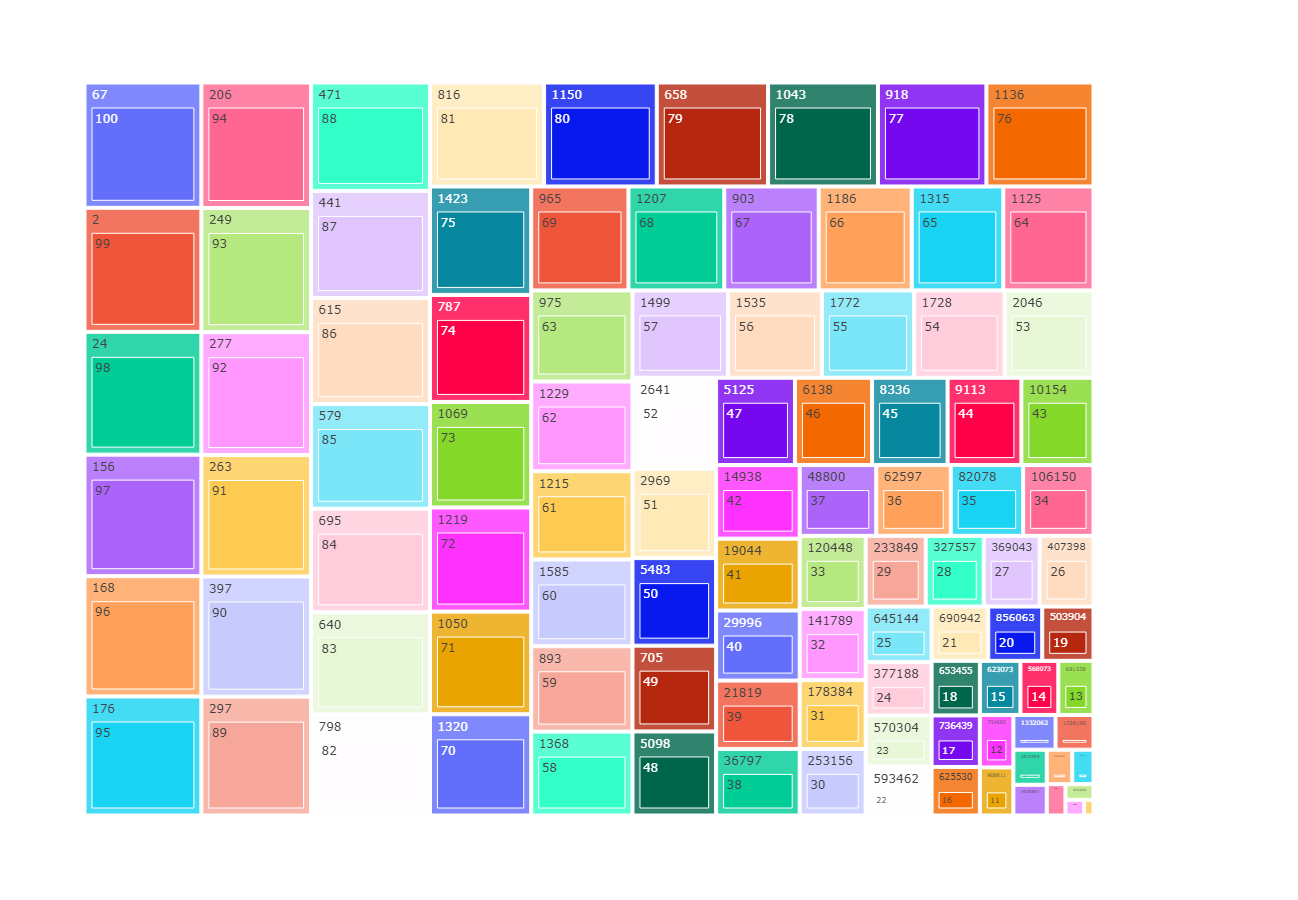

In [352]:
fig = px.treemap(df1,path=['Number_location_with%', 'Percentage'], values='Percentage')#, color='Number_location_with%')
fig.update_layout(height=900, margin_r=200)

# fig.update_layout(margin = dict(t=100, l=50, r=5, b=25))
fig.show()

In [361]:
df1.head()

,Percentage,Number_location_with%
1,0,265091840
9,1,5273876
4,2,46443840
5,3,16373669
7,4,11685762


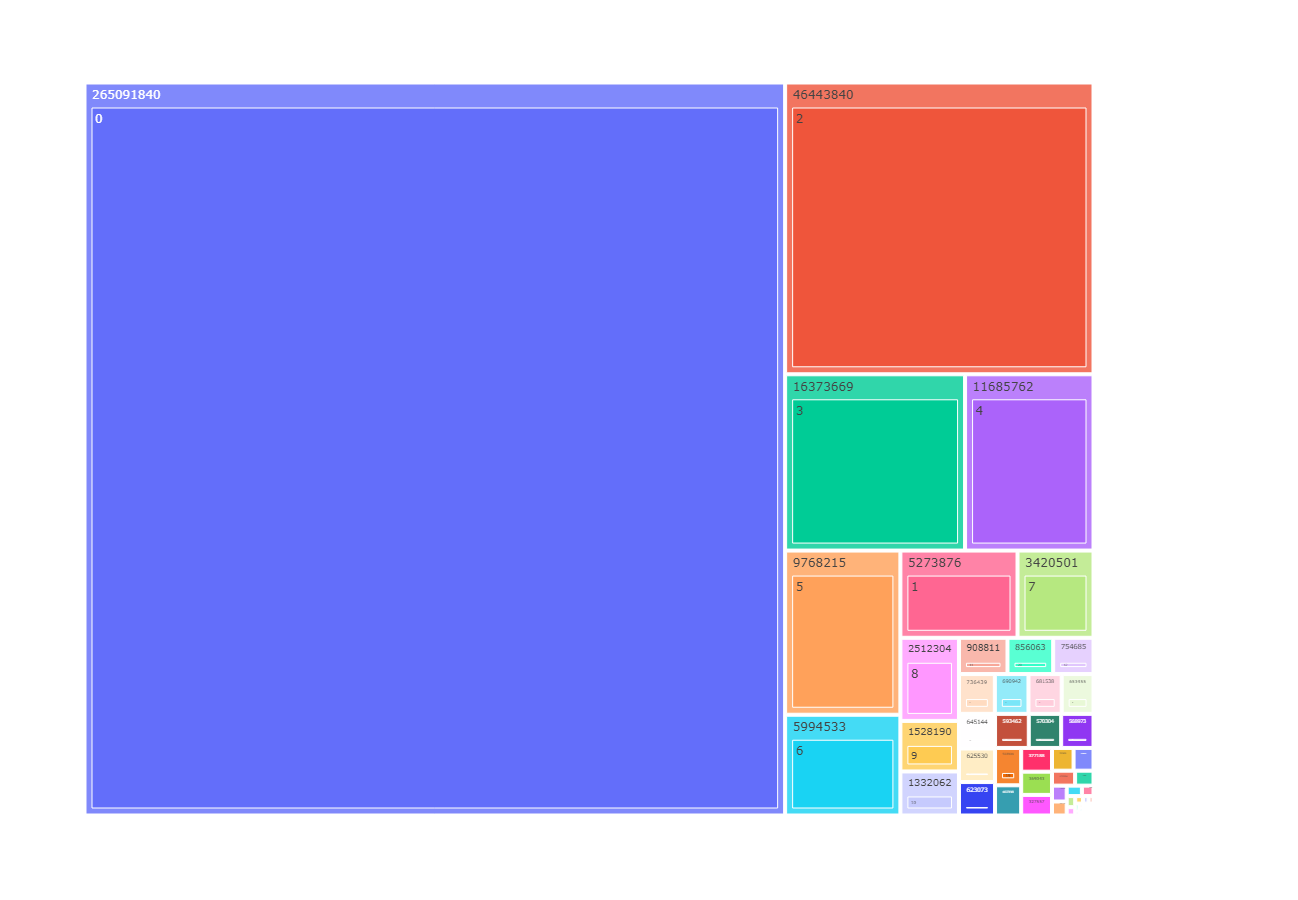

In [364]:
fig = px.treemap(df1,path=['Number_location_with%', 'Percentage'], values='Number_location_with%')#, color='Percentage')
fig.update_layout(height=900, margin_r=200)

# fig.update_layout(margin = dict(t=100, l=50, r=5, b=25))
fig.show()

# Denovo regions call qualities and also looking into just same as reference call qualities.

In [390]:
# Only denovo alleles : >= 90%, 0-10, 10-20, 20-30, ...90-100

In [392]:
#

Denovo_calls_qualities = {}
Denovo_calls_stutter = {}

with open('../../Analysis_KT/Calls_stats/Denovo_calls_info.tsv') as denovo_regions:
    
    for info in tqdm(denovo_regions):
        
        #
        info = info.strip().split()
        
        #
        qual_percent = info[1]
        stutter = info[2]
        
        # qualities
        if qual_percent in Denovo_calls_qualities:
            Denovo_calls_qualities[qual_percent] += 1
        else: Denovo_calls_qualities[qual_percent] = 1
        
        #stutter
        if stutter in Denovo_calls_stutter:
            Denovo_calls_stutter[stutter] += 1
        else: Denovo_calls_stutter[stutter] = 1
    

205884646it [02:22, 1442725.43it/s]


In [425]:
# putting the value in df

#
df_quals = pd.DataFrame({'Percentages':list(Denovo_calls_qualities.keys()), 'Frequency':list(Denovo_calls_qualities.values())})
df_quals = df_quals.astype(int)
df_quals = df_quals.sort_values(by=['Percentages'], ascending=True)

#
df_stutter = pd.DataFrame({'Percentages':list(Denovo_calls_stutter.keys()), 'Frequency':list(Denovo_calls_stutter.values())})
df_stutter = df_stutter.astype(int)
df_stutter = df_stutter.sort_values(by=['Percentages'], ascending=True)

In [432]:
df_quals.head()

,Percentages,Frequency
75,18,1
79,20,1
78,21,5
74,22,4
76,23,5


In [435]:
# Stratifying the based on percentages.

distribution = {}

s=0
e=10
inclusive = 0
for index in tqdm(df_quals.index):
        
        #
        percentage_value = int(df_quals['Percentages'][index])
        frequency = int(df_quals['Frequency'][index])
        
        #
        Range = f'{s}-{e}'
        if e == 100: inclusive =1
        if percentage_value in range(s, e+inclusive):
            if Range in distribution: 
                distribution[Range] += frequency
            else: distribution[Range] = frequency
            
        
        else:
            s = e
            e = e + 10
            Range = f'{s}-{e}'
            if int(percentage_value) in range(s, e):
                if Range in distribution:
                    distribution[Range] += frequency
                else: distribution[Range] = frequency
        

for value in distribution:
    print(value, distribution[value])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [00:00<00:00, 43594.17it/s]

10-20 1
20-30 167
30-40 48213
40-50 79762
50-60 188722
60-70 520137
70-80 1480927
80-90 2221745
90-100 201344972


In [449]:
# Stratifying the based on percentages.

distribution = {}

s=0
e=5
# inclusive = 0
for index in tqdm(df_stutter.index):
        
        #
        percentage_value = int(df_stutter['Percentages'][index])
        frequency = int(df_stutter['Frequency'][index])
        
        #
        Range = f'{s}-{e}'
        if percentage_value in range(s, e+1):
            if Range in distribution: 
                distribution[Range] += frequency
            else: distribution[Range] = frequency
            
        
        else:
            s = e+1
            e = e + 5
            Range = f'{s}-{e}'
            if int(percentage_value) in range(s, e):
                if Range in distribution:
                    distribution[Range] += frequency
                else: distribution[Range] = frequency
        

for value in distribution:
    print(value, distribution[value])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 101/101 [00:00<00:00, 54944.84it/s]

0-5 183843965
6-10 11564758
11-15 2884247
16-20 2849868
21-25 2489127
26-30 1414942
31-35 559773
36-40 174024
41-45 51521
46-50 17862
51-55 8555
56-60 5147
61-65 4403
66-70 4101
71-75 4057
76-80 3379
81-85 2376
86-90 1419
91-95 795
96-100 327


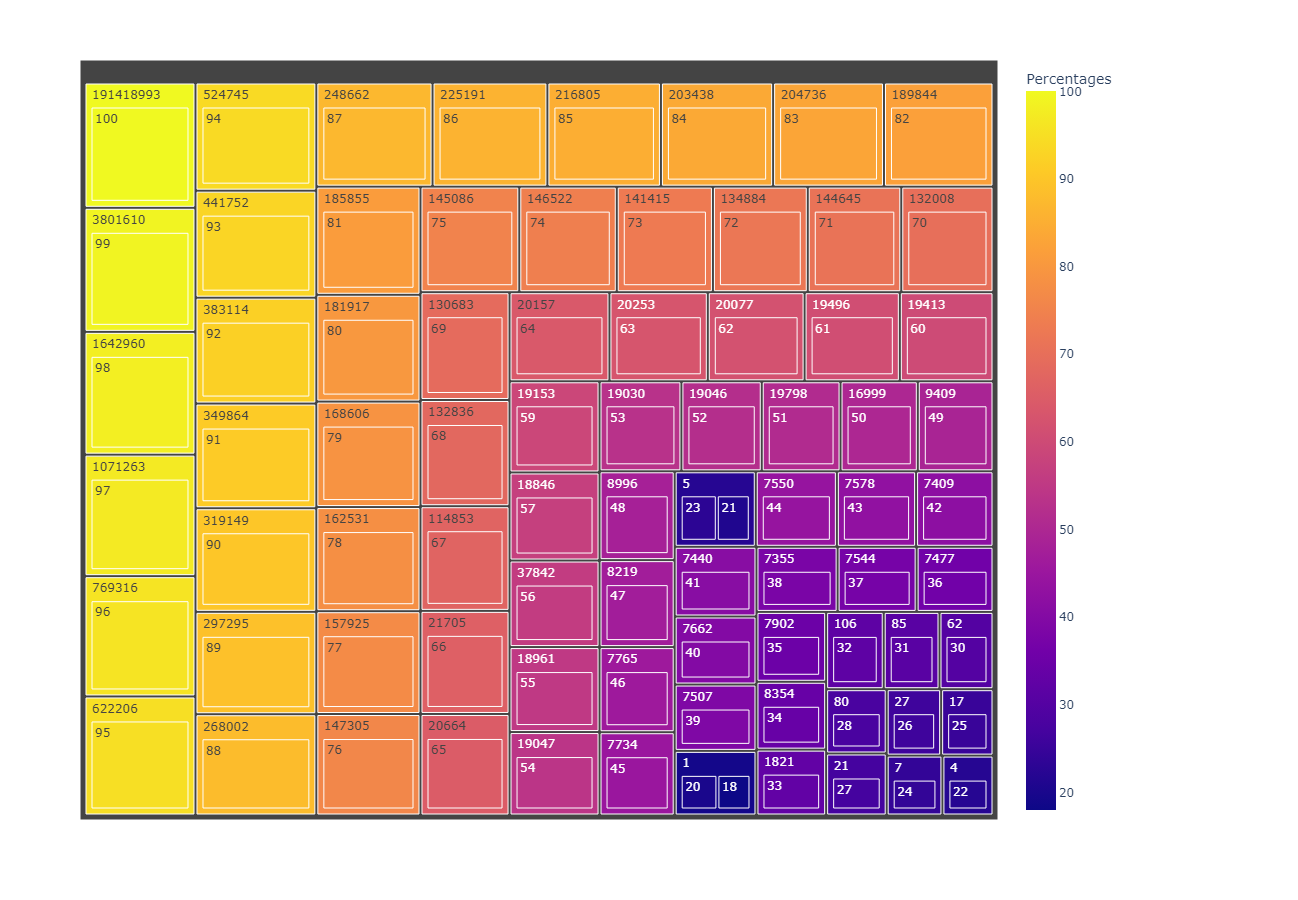

In [452]:
fig = px.treemap(df_quals, path=['Frequency', 'Percentages'], values='Percentages', color='Percentages')#, color='Percentage')
fig.update_layout(height=900, margin_r=300)

# fig.update_layout(margin = dict(t=100, l=50, r=5, b=25))
fig.show()

In [475]:
df_quals.head()


,Percentages,Frequency
75,18,1
79,20,1
78,21,5
74,22,4
76,23,5


In [455]:
df_quals['Percentages'].median()

60.5

In [457]:
Denovo_calls_qualities1 = []
Denovo_calls_stutter1 = []

with open('../../Analysis_KT/Calls_stats/Denovo_calls_info.tsv') as denovo_regions:
    
    for info in tqdm(denovo_regions):
        
        #
        info = info.strip().split()
        
        #
        qual_percent = int(info[1])
        stutter = int(info[2])
        
        #
        Denovo_calls_qualities1.append(qual_percent)
        Denovo_calls_stutter1.append(stutter)

205884646it [02:36, 1313966.48it/s]


In [459]:
len(Denovo_calls_qualities1), len(Denovo_calls_stutter1)

(205884646, 205884646)

In [473]:
print(sum(Denovo_calls_qualities1)/len(Denovo_calls_qualities1), sum(Denovo_calls_stutter1)/len(Denovo_calls_stutter1))

99.33703397678329 2.3214039622944975


In [469]:
statistics.median(Denovo_calls_qualities1)

100.0

In [474]:
statistics.median(Denovo_calls_stutter1)

0.0

In [482]:
chr_counts = {}

with gzip.open('../../Analysis_KT/Calls_stats/Denovo_calls_info.tsv.gz', 'rt') as denovo_regions:
    
    for info in tqdm(denovo_regions):
        
        #
        info = info.strip().split()
        info = info[0].split(':')[0]
        if info in chr_counts:
            chr_counts[info] += 1
        else: chr_counts[info] = 1


205884646it [02:59, 1147271.30it/s]


In [490]:
s = 0

for i in chr_counts:
    
    if len(i) <6: continue
    s += int(chr_counts[i])
    
print(s)

7315
